# Loading data

In [116]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("dataframe_.csv")
df

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1692,25.410184,-76.380902
1693,29.537304,-82.796934
1694,31.633331,-87.000000
1695,29.091458,-104.943052


# Data analysing and cleaning

In [117]:
df.isnull().sum()

input     1
output    1
dtype: int64

In [118]:
df.dropna(inplace=True)

In [119]:
df.isnull().sum()

input     0
output    0
dtype: int64

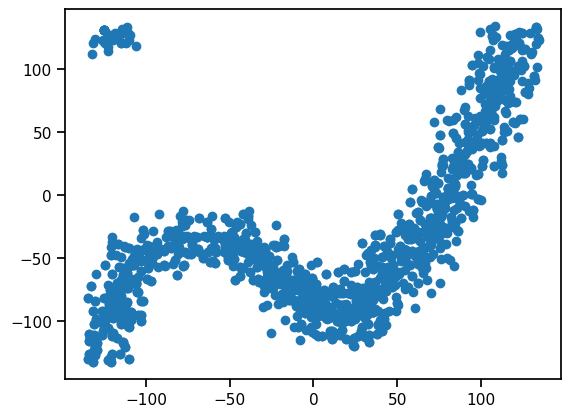

In [120]:
plt.scatter(df['input'],df['output'])
plt.show()

# Removing outliers

<AxesSubplot:xlabel='output'>

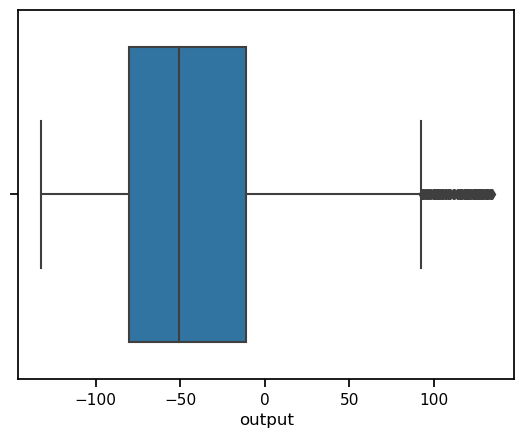

In [121]:
import seaborn as sns
sns.boxplot(df['output'])

In [122]:
q1=df['output'].quantile(0.25)
q3=df['output'].quantile(0.75)
iqr=q3-q1
upr_lmt=q3+1.5*iqr
lwr_lmt=q1-1.5*iqr
iqr

69.02676665

In [123]:
upper = np.where(df['output'] >= (q3+1.5*iqr))
# Lower bound
lower = np.where(df['output'] <= (q1-1.5*iqr))
 
''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

<AxesSubplot:xlabel='input'>

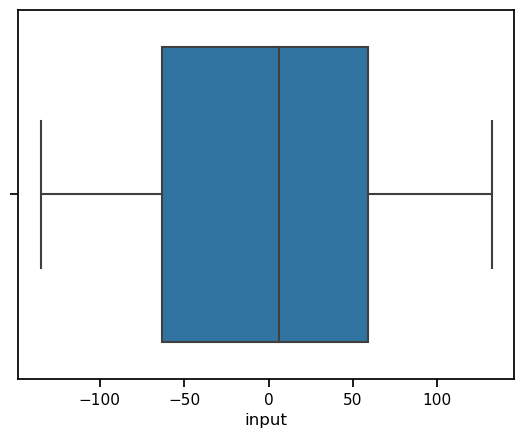

In [124]:
import seaborn as sns
sns.boxplot(df['input'])

In [125]:
q5=df['input'].quantile(0.25)
q7=df['input'].quantile(0.75)
upper = np.where(df['input'] >= (q7+1.5*iqr))
# Lower bound
lower = np.where(df['input'] <= (q5-1.5*iqr))
 
''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

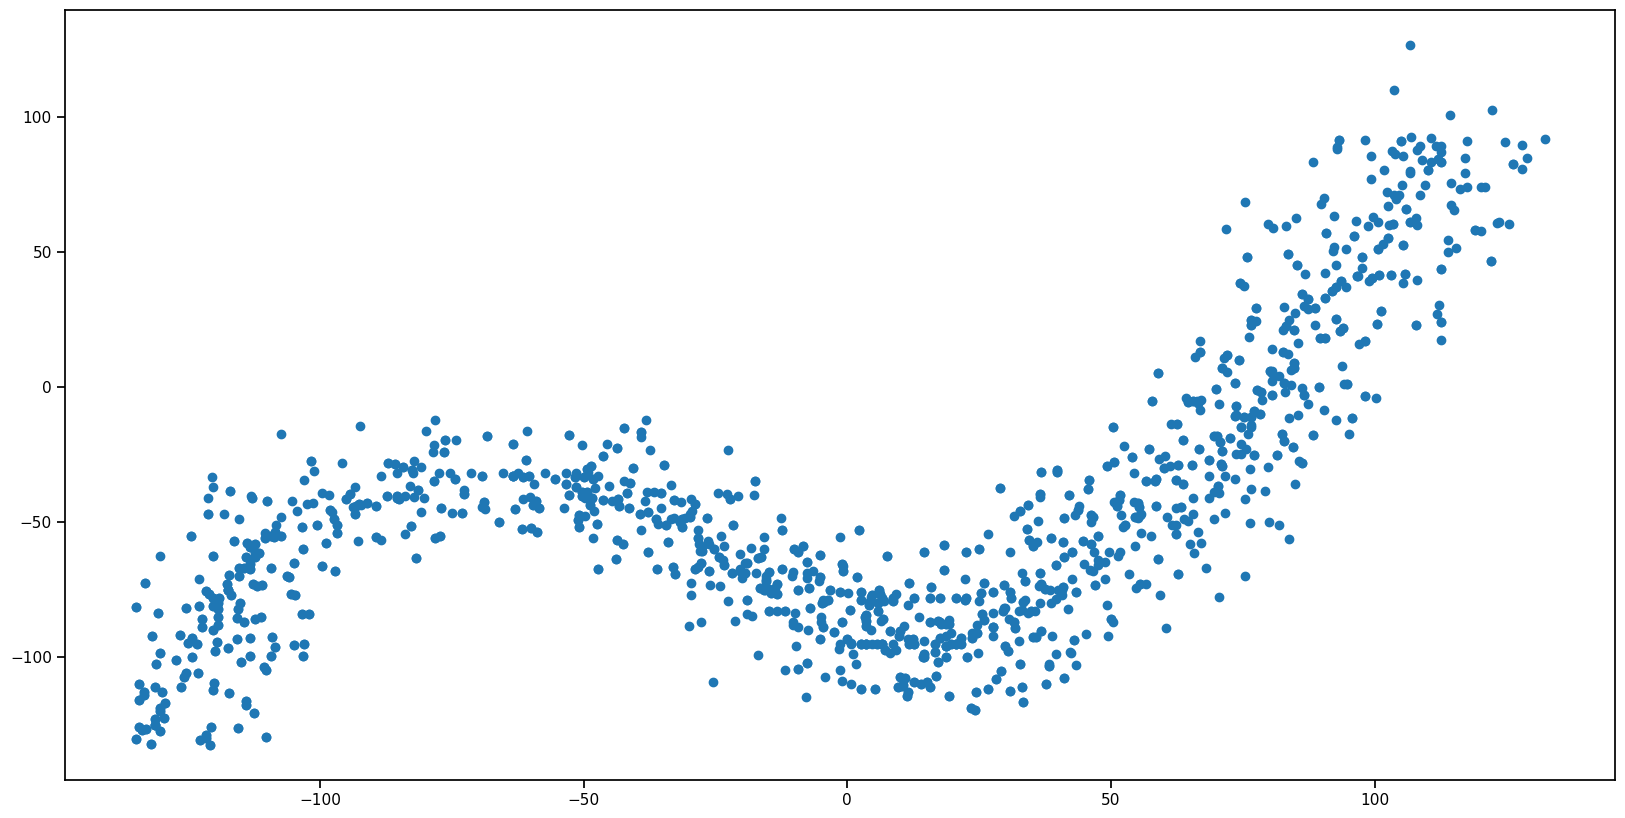

In [126]:
plt.figure(figsize=(20,10))
plt.scatter(df['input'],df['output'])
plt.show()

# Visualisation of Data

Text(0.5, 0, 'size')

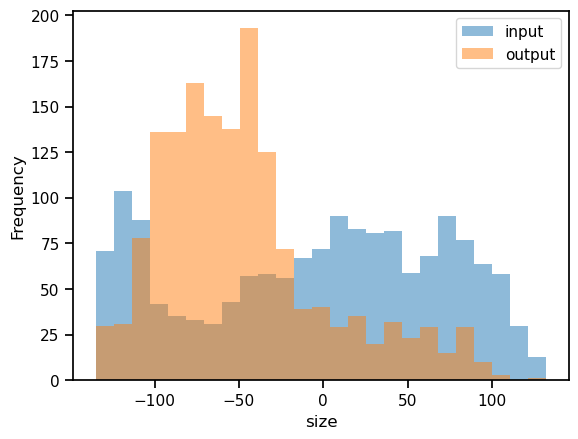

In [127]:
import seaborn as sns
sns.set_context('notebook')
ax=df.plot.hist(bins=25,alpha=0.5)
ax.set_xlabel('size')

<AxesSubplot:>

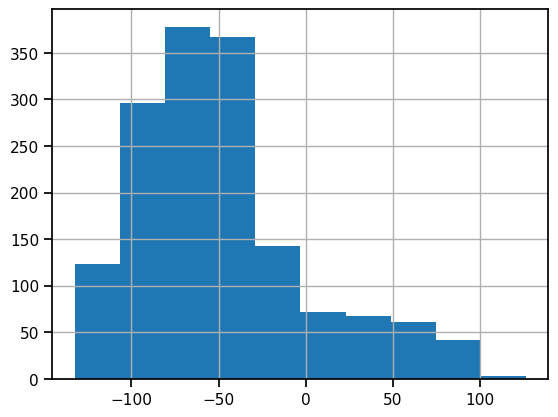

In [128]:
df.output.hist()

# Applying Linear Regression 

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
x_train,x_test,y_train,y_test=train_test_split(df['input'],df['output'],test_size=0.25,random_state=0)
x_train=np.array(x_train).reshape(-1,1)
alg=LinearRegression()
alg.fit(x_train,y_train)




LinearRegression()

In [130]:
x_test=np.array(x_test).reshape(-1,1)
y_predict=alg.predict(x_test)
y_predict

array([-7.01991394e+01, -1.85356924e+01, -1.71565460e+01, -9.23609309e-02,
       -5.16875966e+01, -6.04491921e+01, -6.17892379e+01, -6.31772916e+01,
       -9.22410306e+01, -2.16778453e+01, -9.16279364e+01, -6.59873264e+01,
       -3.45376407e+01, -2.84035559e+01, -1.63777480e+01, -6.36558734e+01,
       -7.72056594e+01, -6.12435526e+01, -4.05106243e+01, -1.35638538e+01,
       -8.78546286e+01, -9.57982334e+01, -7.97621554e+01, -8.84662306e+01,
        4.04392421e+00, -5.05297339e+01, -4.63674000e+01, -1.59650052e+01,
       -4.93941154e+01, -2.71985980e+01, -9.09871925e+01, -9.42720460e+01,
       -1.63621855e+01, -5.71780532e+01, -1.95396274e+01, -9.56715162e+01,
       -2.14354561e+01, -6.57669574e+00, -4.39295835e+01, -3.58549606e+01,
       -4.05476448e+01, -2.48862524e+01, -7.71254303e+01, -5.48886687e+01,
       -4.26758202e+01, -4.53563430e+01, -9.06348903e+01, -3.50144993e+01,
       -3.18286838e+01, -5.30512926e+01, -7.39569568e+01, -6.10236179e+01,
       -8.07053843e+01, -

In [131]:
alg.score(x_train,y_train)

0.3575654306497702

In [132]:
r2_score(np.array(y_test).reshape(-1,1),y_predict)

0.3451320380006039

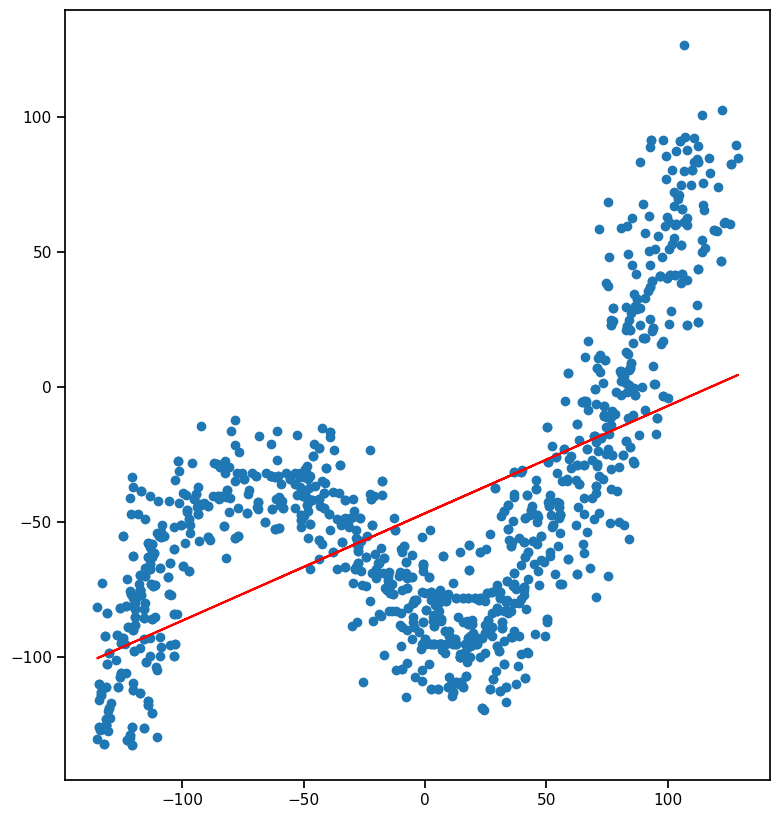

In [133]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,2)
m=alg.coef_[0]
c=alg.intercept_
y_line=m*(x_train)+c
plt.scatter(x_train,y_train)
plt.plot(x_train,y_line,"r")
plt.show()

## The above prediction line is not good .So lets do some feature Scaling

# Linear Regression with Feature Engineering using polynomial Regression 

In [134]:
from sklearn.preprocessing import (StandardScaler,PolynomialFeatures)
pf=PolynomialFeatures(degree=20)
f_alg=LinearRegression()
x=df['input']
y=df['output']
x=np.array(x).reshape(-1,1)


In [135]:
x_poly=pf.fit_transform(x)

In [136]:
fea_alg=LinearRegression()

In [137]:
fea_alg.fit(x_poly,y)
y_pred=fea_alg.predict(x_poly)
y_pred

array([-108.63334826, -106.99150137, -153.2622576 , ...,  -55.66992393,
        -55.66996808,  -55.66998843])

In [138]:
print(x.shape,y.shape)

(1552, 1) (1552,)


[Text(0.5, 0, 'x'), Text(0, 0.5, 'y')]

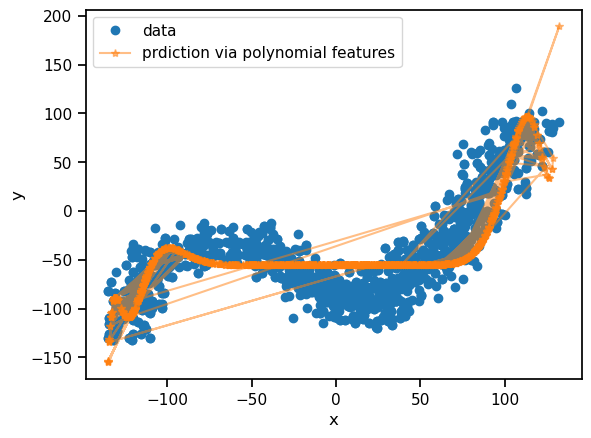

In [139]:
plt.plot(x,y,ls="",marker='o',label='data',alpha=1)
plt.plot(x,y_pred,marker='*',label='prdiction via polynomial features',alpha=0.5)
plt.legend()
ax=plt.gca()
ax.set(xlabel='x',ylabel='y')

In [140]:
r2_score(y,y_pred)

0.5884925582350631

# Linear Regression with Feature Engineering using polynomial Regression and using standard scaler

In [141]:
s = StandardScaler()
X_train_s = s.fit_transform(x_train)
X_test_s=s.fit_transform(x_test)

In [142]:
#applying polynomial regression degree 2
poly = PolynomialFeatures(degree=20, include_bias=True)
x_train_trans = poly.fit_transform(X_train_s)
x_test_trans = poly.transform(X_test_s)
#include bias parameter
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)
print(r2_score(y_test, y_pred))

0.8466904644587357


## we got the r2_score of 85 % compared to 59% with no standard scaling using polynomial regression and 35 % using linear Regression before

# Other model like Ridge Regression and Ridge Cv

In [143]:
y_col = "output"
X = df.drop(y_col, axis=1)
y = df[y_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=72018)

In [144]:
s = StandardScaler()
X_train_s = s.fit_transform(X_train)
X_test_s = s.transform(X_test)
from sklearn.linear_model import Ridge, RidgeCV, Lasso
#Ridge Regression Model
ridgeReg = Ridge(alpha=0.1)

ridgeReg.fit(X_train_s,y_train)

#train and test scorefor ridge regression
train_score_ridge = ridgeReg.score(X_train_s, y_train)
test_score_ridge = ridgeReg.score(X_test_s, y_test)

print("\nRidge Model............................................\n")
print("The train score for ridge model is {}".format(train_score_ridge))
print("The test score for ridge model is {}".format(test_score_ridge))


Ridge Model............................................

The train score for ridge model is 0.3509193702319031
The test score for ridge model is 0.35986214654757953


# Hyperparameter tuning in Ridge CV

In [145]:
#Using the linear CV model
from sklearn.linear_model import RidgeCV

#Lasso Cross validation
ridge_cv = RidgeCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10]).fit(X_train_s, y_train)

#score
print("The train score for ridge model is {}".format(ridge_cv.score(X_train_s, y_train)))
print("The train score for ridge model is {}".format(ridge_cv.score(X_test_s, y_test)))

The train score for ridge model is 0.35091907621237406
The train score for ridge model is 0.3598764582980061
